In [1]:
from utils.Model import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist



%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Load the raw Fashion-MNIST data.
train, val = fashion_mnist.load_data()

X_train_raw, y_train = train
X_val_raw, y_val = val

X_train = X_train_raw.reshape((X_train_raw.shape[0], X_train_raw.shape[1]**2))
X_val = X_val_raw.reshape((X_val_raw.shape[0], X_val_raw.shape[1]**2))

#Index from the 10000th image of the dataset
# X_val = X_train[10000:10500,:]
# y_val = y_train[10000:10500]
# X_train = X_train[10500:12500,:]
# y_train = y_train[10500:12500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We've vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Training data shape:  (60000, 784)
Training labels shape:  (60000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)


In [11]:
input_size = 784
num_class = 10

model = Sequential(Input_size=input_size)
model.add('Dense', 100)
# model.add('Dense', 50)
model.add('Dense', num_class)
# model.add('Dense', o)


In [12]:
from utils.Optimizers import SGDOptim, my_SGD




optimizer = my_SGD()
lr = 1e-2
epoch = 5
batch=100

loss_hist, train_acc_hist, valid_acc_hist = optimizer.train(
        model, X_train, y_train, X_val, y_val, epoch, batch, lr)



number of batches for training: 600
epoch 1: loss = 0.0, train acc = 0.1, val acc = 0.1, lr = 0.0095
epoch 2: loss = 0.0, train acc = 0.1, val acc = 0.1, lr = 0.009025
epoch 3: loss = 0.0, train acc = 0.1, val acc = 0.1, lr = 0.00857375
epoch 4: loss = 0.0, train acc = 0.1, val acc = 0.1, lr = 0.0081450625
epoch 5: loss = 0.0, train acc = 0.1, val acc = 0.1, lr = 0.007737809374999999


In [10]:
# model.layers["Dense_1"].params["weight"] += 1
print(model.layers["Dense_1"].params["weight"])
print(model.layers["Dense_1"].params["bias"])


[[ 7.2232271e-03  5.4598087e-03  6.2410845e-03 ...  6.2487274e-03
   4.2276145e-03  6.4158384e-03]
 [ 2.9601532e-03  7.1315295e-03  3.0140798e-03 ...  7.7093061e-04
   3.6185063e-04  1.2842091e-03]
 [ 1.5525855e-03  7.3130787e-03  6.1980598e-03 ...  1.2476877e-05
   4.8417682e-03  4.4607115e-03]
 ...
 [ 3.8614895e-03  5.6426134e-03  1.6518822e-03 ...  4.3760883e-03
   5.9943213e-03  1.8820980e-03]
 [ 3.5516075e-03  8.8919615e-03  5.8305012e-03 ... -7.3966919e-04
   5.8462513e-03 -1.5092519e-04]
 [ 3.2761386e-03  8.7118819e-03 -1.0894649e-04 ...  5.7156081e-03
   7.9068244e-03  1.2597229e-04]]
[-1.4848181e-04 -5.9710936e-05  1.3851262e-04  1.5070011e-04
 -2.0773191e-04 -3.3266686e-05  3.1904463e-05  2.0668875e-05
  2.1343202e-04 -4.0140822e-05 -2.2058784e-04  5.8074253e-05
  2.8100543e-04  2.5069086e-05  1.1191701e-04  6.7879177e-05
  2.1610533e-04  3.5812347e-05  2.9970706e-04 -1.6853523e-04
 -1.8685327e-04  1.2182040e-04 -5.6740213e-05  1.5102420e-04
  1.4666665e-05 -1.0023034e-06  1.

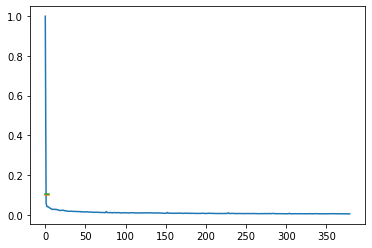

In [6]:
# print(loss_hist, train_acc_hist, valid_acc_hist)

plt.plot(loss_hist/np.max(loss_hist))
plt.plot(train_acc_hist)
plt.plot(valid_acc_hist);



In [7]:
a = []
b = []
a.append([2.3])
a.append([])
b.append([1,5])
b.append([])
for k in range(len(a)):
    print('k:',k)
    for j in range(len(a[k])):
        print('j:',j)
        print('result:',a[k][j]-b[k][j])

k: 0
j: 0
result: 1.2999999999999998
k: 1


In [12]:
a = dict()
b = dict()

a['dense_1_w'] = 5
b['dense_1_w'] = 5


for k in a:
    print('name:', k)
    print('result:', a[k]-b[k])


name: dense_1_w
result: 0
